In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
location = 'C:/Users/rbvan/Desktop/python-api-challenge/output_data/'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Create Collumns for DF
names = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []
x = 1

weatherpy_dict = {'City':names,'Lat':lat,'Lng':lon,'Max Temp':max_temp,'Humidity':humidity,'Cloudiness':clouds,
                  'Wind Speed':wind,'Country':country,'Date':date}

# Go through each city to pull weather and geographic info

for city in cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        names.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {x} | {city}')
    
    except:
        print('City not found. Skipping...')
    
    x += 1

City not found. Skipping...
Processing Record 2 | birao
Processing Record 3 | ushuaia
Processing Record 4 | hearst
Processing Record 5 | hilo
Processing Record 6 | jamestown
Processing Record 7 | port alfred
Processing Record 8 | rawson
Processing Record 9 | nemuro
Processing Record 10 | nome
Processing Record 11 | anqing
City not found. Skipping...
Processing Record 13 | lavrentiya
Processing Record 14 | rundu
Processing Record 15 | coquimbo
Processing Record 16 | qaanaaq
Processing Record 17 | lagoa
City not found. Skipping...
Processing Record 19 | thunder bay
City not found. Skipping...
Processing Record 21 | saint george
Processing Record 22 | wajima
Processing Record 23 | temiscaming
Processing Record 24 | saldanha
Processing Record 25 | carnarvon
City not found. Skipping...
Processing Record 27 | ribeira grande
Processing Record 28 | victoria
Processing Record 29 | rikitea
Processing Record 30 | barrow
Processing Record 31 | ponta do sol
Processing Record 32 | albany
Processing 

Processing Record 254 | copiapo
Processing Record 255 | ossora
Processing Record 256 | nishihara
Processing Record 257 | kodinar
Processing Record 258 | kumo
Processing Record 259 | mirnyy
Processing Record 260 | campo maior
Processing Record 261 | ostersund
Processing Record 262 | serenje
Processing Record 263 | katsuura
Processing Record 264 | san salvo
Processing Record 265 | dibulla
Processing Record 266 | iqaluit
Processing Record 267 | kwinana
Processing Record 268 | verkhoyansk
City not found. Skipping...
Processing Record 270 | mount isa
City not found. Skipping...
Processing Record 272 | yellowknife
Processing Record 273 | carnot
Processing Record 274 | ballina
Processing Record 275 | salalah
Processing Record 276 | puerto madero
Processing Record 277 | shimoda
Processing Record 278 | ayorou
Processing Record 279 | wekiva springs
Processing Record 280 | aberystwyth
Processing Record 281 | camocim
Processing Record 282 | butaritari
Processing Record 283 | faanui
Processing Reco

Processing Record 506 | hervey bay
Processing Record 507 | altamont
Processing Record 508 | curaca
Processing Record 509 | arkansas city
Processing Record 510 | port hedland
Processing Record 511 | san vicente
Processing Record 512 | zaliznychne
Processing Record 513 | pokhara
Processing Record 514 | san quintin
City not found. Skipping...
Processing Record 516 | juegang
Processing Record 517 | champoton
Processing Record 518 | fairbanks
Processing Record 519 | achinsk
Processing Record 520 | berlevag
Processing Record 521 | hereford
Processing Record 522 | lanzhou
Processing Record 523 | yamasaki
Processing Record 524 | metro
Processing Record 525 | kenai
Processing Record 526 | sorland
Processing Record 527 | novoagansk
Processing Record 528 | vilyuysk
Processing Record 529 | palmer
Processing Record 530 | port blair
Processing Record 531 | zhytomyr
Processing Record 532 | muskegon
Processing Record 533 | kikwit
City not found. Skipping...
Processing Record 535 | adrar
Processing Rec

In [4]:
# Create DataFrame
df = pd.DataFrame(weatherpy_dict)

In [5]:
# Store any Humidy Points over 100%
high_humidity = df[df['Humidity']>100].index

# Save rest of DF
df = df[df['Humidity']<=100]

In [6]:
# Remove any Outliers from Humidity

quart = df['Humidity'].describe()[['25%','50%','75%']]

lowq = quart[0]
uppq = quart[2]
iqr = uppq - lowq
lowb = lowq - (iqr*1.5)
uppb = uppq + (iqr*1.5)

clean_df = df[(df['Humidity']>lowb) & (df['Humidity']<uppb)]

In [7]:
# Show len of Clean DF to ensure enough data to analyze

len(clean_df)

545

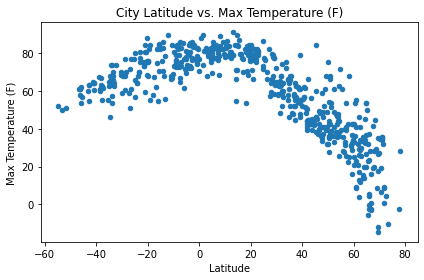

In [22]:
# Temperature (F) vs. Latitude
def Lat_Temp(df=clean_df,title_ad='',print_reg=False):
    df = df
    slope, yint, _r, _p, std_err = linregress(df['Lat'], df['Max Temp'])
    x_values = df['Lat'].values
    regress_values = (slope*x_values)+yint
    form = str(f'y = ({str(round(slope,2))} * x) + {str(round(yint,2))}')
    title = f'{title_ad}City Latitude vs. Max Temperature (F)'
    
    df.plot(kind='scatter',x='Lat',y='Max Temp',title=title)
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (F)')
    plt.tight_layout()
    
    if print_reg == True:
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(form,(x_values.min(),regress_values.min()),fontsize=15,color="red")
        print(f"The r-value is: {_r**2}")
    
    plt.savefig(f'{location}{title}.png')
    
    plt.show()
    
Lat_Temp()

You can see a very clear peak of Max Temperatures on the above scatter plot at latitudes (-20 to 20).
Looks like our dataset found more cities at higher latitudes, however they still mirror the lower latitude Temperature distribution.

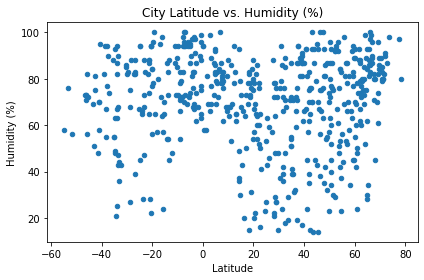

In [23]:
# Humidity (%) vs. Latitude
def Lat_Hum(df=clean_df,title_ad='',print_reg=False):
    slope, yint, _r, _p, std_err = linregress(df['Lat'], df['Humidity'])
    x_values = df['Lat'].values
    regress_values = (slope*x_values)+yint
    form = str(f'y = ({str(round(slope,2))} * x) + {str(round(yint,2))}')
    title = f'{title_ad}City Latitude vs. Humidity (%)'
    
    df.plot(kind='scatter',x='Lat',y='Humidity',title=title)
    plt.xlabel('Latitude')
    plt.ylabel('Humidity (%)')

    plt.tight_layout()
    
    if print_reg == True:
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(form,(x_values.min(),regress_values.min()),fontsize=15,color="red")
        print(f"The r-value is: {_r**2}")
    
    plt.savefig(f'{location}{title}.png')
    
    plt.show();

Lat_Hum()

The Latitude's above the equator did appear to have more data points with lower Humidity %'s than those below the equator.

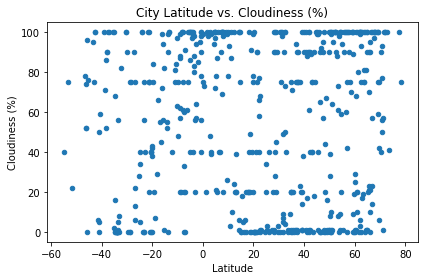

In [24]:
# Cloudiness (%) vs. Latitude
def Lat_Cloud(df=clean_df,title_ad='',print_reg=False):
    slope, yint, _r, _p, std_err = linregress(df['Lat'], df['Cloudiness'])
    x_values = df['Lat'].values
    regress_values = (slope*x_values)+yint
    form = str(f'y = ({str(round(slope,2))} * x) + {str(round(yint,2))}')
    title = f'{title_ad}City Latitude vs. Cloudiness (%)'
    
    df.plot(kind='scatter',x='Lat',y='Cloudiness',title=title)
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness (%)')
    
    plt.tight_layout()

    if print_reg == True:
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(form,(x_values.min(),regress_values.min()),fontsize=15,color="red")
        print(f"The r-value is: {_r**2}")
    
    plt.savefig(f'{location}{title}.png')
    
    plt.show();
    
Lat_Cloud()

I do not see any trends

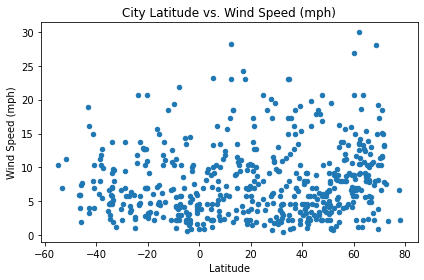

In [25]:
# Wind Speed (mph) vs. Latitude
def Lat_Wind(df=clean_df,title_ad='',print_reg=False):
    slope, yint, _r, _p, std_err = linregress(df['Lat'], df['Wind Speed'])
    x_values = df['Lat'].values
    regress_values = (slope*x_values)+yint
    form = str(f'y = ({str(round(slope,2))} * x) + {str(round(yint,2))}')
    title = f'{title_ad}City Latitude vs. Wind Speed (mph)'
    
    df.plot(kind='scatter',x='Lat',y='Wind Speed',title=title)
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (mph)')
    
    plt.tight_layout()

    if print_reg == True:
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(form,(x_values.min(),regress_values.min()),fontsize=15,color="red")
        print(f"The r-value is: {_r**2}")
        
    plt.savefig(f'{location}{title}.png')
    
    plt.show();
    
Lat_Wind()

No obvious trends to point out, though I'd like to explore whether Wind Speed has an inverse relationship with Humidity %.

In [12]:
# Create Northern and Southern Hemisphere Data Frames

n_df = clean_df[clean_df['Lat'] >= 0]
s_df = clean_df[clean_df['Lat'] < 0]
frames = [n_df,s_df]
hems = ['Northern Hemisphere - ','Southern Hemisphere - ']

The r-value is: 0.7681781929977671


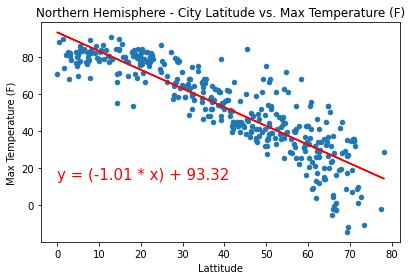

In [13]:
# Temperature (F) vs. Latitude (North)
Lat_Temp(n_df,hems[0],print_reg=True)

Clear relationship for the Northern Hemisphere where the more north a city is, the lower the max temperature is

The r-value is: 0.4677155324212882


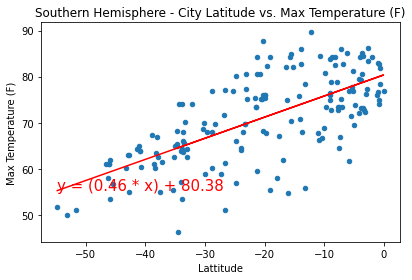

In [14]:
# Temperature (F) vs. Latitude (South)
Lat_Temp(s_df,hems[1],print_reg=True)

Similar trend for the Southern Hemisphere when comparing Latitude and Max Temperature. Though it does seem to get colder at a higher rate when increases latitudes above the equator vs decreasing latitudes below the equator.

The r-value is: 0.016288954784406524


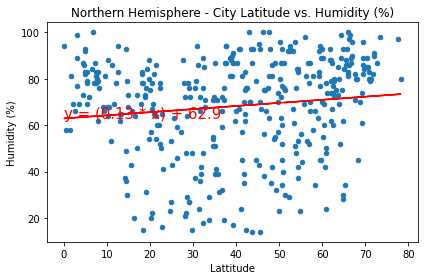

In [15]:
# Humidity (%) vs. Latitude (North)
Lat_Hum(n_df,hems[0],print_reg=True)

The majority of Northern Hemisphere city data is 60% humididity of above. Very slight positive correlation between Latitude and Humidy shown in the Norther Hemisphere city data.

The r-value is: 0.08764807401997649


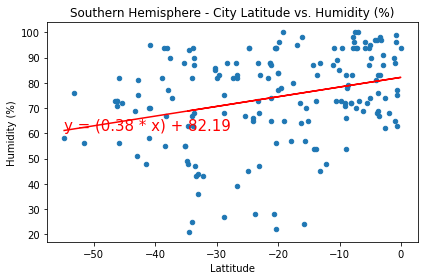

In [16]:
# Humidity (%) vs. Latitude (South)
Lat_Hum(s_df,hems[1],print_reg=True)

A bit stronger positive correlation in the southern hemisphere for Latitude and Humidity. Interesting that the southern hemisphere cities grew in humidity as they approached the equator while the northern hemisphere cities grew as the moved away from the equator. I would explore the increase in southern hemisphere landmass that is mostly from South American rainforest area and the increase in northern hemisphere landmass that moves away from South America and captures more of Africa.

The r-value is: 0.004465976245019458


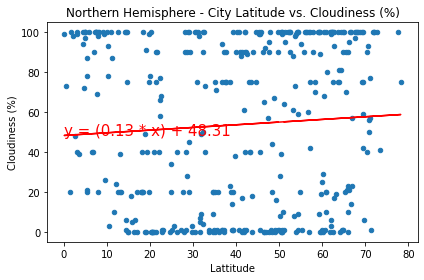

In [17]:
# Cloudiness (%) vs. Latitude (North)
Lat_Cloud(n_df,hems[0],print_reg=True)

slight positive correlation for Latitude and Cloudiness

The r-value is: 0.071530024536672


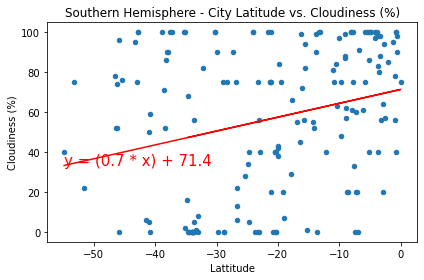

In [18]:
# Cloudiness (%) vs. Latitude (South)
Lat_Cloud(s_df,hems[1],print_reg=True)

See Humidity analysis above. This could further support that point.

The r-value is: 0.007910617764598194


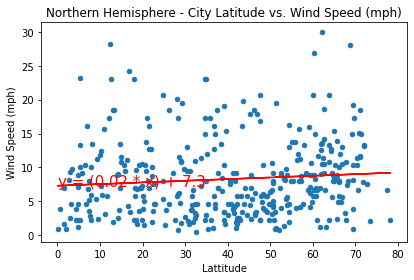

In [19]:
# Wind Speed (mph) vs. Latitude (North)
Lat_Wind(n_df,hems[0],print_reg=True)

The r-value is: 0.01951810794229208


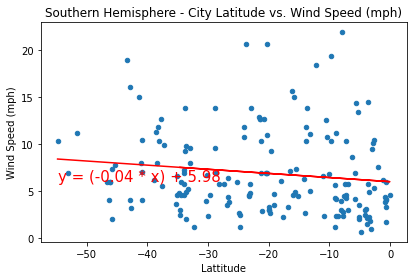

In [20]:
# Wind Speed (mph) vs. Latitude (South)
Lat_Wind(s_df,hems[1],print_reg=True)

There is a clear trend that the closer a city is to either pole, the greater the average wind speed

In [21]:
clean_df.to_csv(location+'cities.csv')